In [33]:
# matplotlib 한글 출력 가능하도록 만들기
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/gulim.ttc").get_name()
rc('font', family=font_name)

# 데이터 분석 모듈
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# third_crawler로 만든 데이터 로드
df = pd.read_csv('data/statiz_final.csv')

# 해당 데이터셋 선수명으로 정렬 및 인덱스 정리
df = df.sort_values(['선수'])
df = df.reset_index(drop=True)
del df['Unnamed: 0']
df.drop([211,673,1311,1312,33,51,386,387,488,697,1041,1145,383,384,385], inplace=True)

In [5]:
df['연봉'] = df['연봉'].astype(int)
# 해당 데이터셋 선수명으로 정렬 및 인덱스 정리
df = df.sort_values(['선수'])
df = df.reset_index(drop=True)
df.loc[df['연도']==2019, '연봉']=0
# if 연봉 >0 -> train/ else -> test
train = df[df['연봉'] > 0].copy()
test = df[df['연봉'] == 0].copy()

In [12]:
# feature 에 쓰이지 않을 정보들 제외
feature_names = test.columns.tolist()
print(feature_names)
feature_names.remove("선수")
feature_names.remove("연도")
feature_names.remove("생일")
feature_names.remove("연봉")
feature_names.remove("포지션")
# feature 에 쓰이지 않을 정보들 추가제외(8/26)
feature_names.remove("고4")
feature_names.remove("볼넷")
feature_names.remove("타석")
feature_names.remove("타수")
feature_names.remove("루타")
feature_names.remove("안타")
feature_names.remove("2타")
feature_names.remove("3타")

['선수', 'WAR', 'G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율', '출루', '장타', 'OPS', 'wOBA', 'wRC+', 'WAR+', '연도', '포지션', '생일', '연봉', '나이']


In [13]:
train = train.replace(pd.np.nan, 0)
test = test.replace(pd.np.nan, 0)

<ipython-input-13-0fc76782340f>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  train = train.replace(pd.np.nan, 0)
<ipython-input-13-0fc76782340f>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  test = test.replace(pd.np.nan, 0)


In [14]:
# 예측값 라벨링, label = 연봉
label_name = '연봉'

X_train = train[feature_names].astype(int)
y_train = train[label_name]

X_test = test[feature_names].astype(int)
y_test = test[label_name]

print(len(y_train))

1319


In [15]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)

In [16]:
#scikit-learn 모듈 로드
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(5,30,10)
max_features = np.random.uniform(0.3,1.0,10)
param_distributions = {'max_depth':max_depth, 'max_features':max_features}
regressor = RandomizedSearchCV(model,
                              param_distributions,
                              n_iter=10,
                              scoring=None,
                              cv=5,
                              verbose=2,
                              random_state=52)

In [17]:
regressor.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_features=0.5071959729552366, max_depth=20 ...................
[CV] .... max_features=0.5071959729552366, max_depth=20, total=   0.0s
[CV] max_features=0.5071959729552366, max_depth=20 ...................
[CV] .... max_features=0.5071959729552366, max_depth=20, total=   0.0s
[CV] max_features=0.5071959729552366, max_depth=20 ...................
[CV] .... max_features=0.5071959729552366, max_depth=20, total=   0.0s
[CV] max_features=0.5071959729552366, max_depth=20 ...................
[CV] .... max_features=0.5071959729552366, max_depth=20, total=   0.0s
[CV] max_features=0.5071959729552366, max_depth=20 ...................
[CV] .... max_features=0.5071959729552366, max_depth=20, total=   0.0s
[CV] max_features=0.4479690423583763, max_depth=22 ...................
[CV] .... max_features=0.4479690423583763, max_depth=22, total=   0.0s
[CV] max_features=0.4479690423583763, max_depth=22 ...................
[CV] .... max_fe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .... max_features=0.7533951216060089, max_depth=26, total=   0.0s
[CV] max_features=0.7533951216060089, max_depth=26 ...................
[CV] .... max_features=0.7533951216060089, max_depth=26, total=   0.0s
[CV] max_features=0.7533951216060089, max_depth=26 ...................
[CV] .... max_features=0.7533951216060089, max_depth=26, total=   0.0s
[CV] max_features=0.7533951216060089, max_depth=26 ...................
[CV] .... max_features=0.7533951216060089, max_depth=26, total=   0.0s
[CV] max_features=0.5071959729552366, max_depth=22 ...................
[CV] .... max_features=0.5071959729552366, max_depth=22, total=   0.0s
[CV] max_features=0.5071959729552366, max_depth=22 ...................
[CV] .... max_features=0.5071959729552366, max_depth=22, total=   0.0s
[CV] max_features=0.5071959729552366, max_depth=22 ...................
[CV] .... max_features=0.5071959729552366, max_depth=22, total=   0.0s
[CV] max_features=0.5071959729552366, max_depth=22 ...................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   param_distributions={'max_depth': array([22, 26, 20, 16, 13, 23, 27, 24, 20, 11]),
                                        'max_features': array([0.74053506, 0.70323971, 0.50719597, 0.81286095, 0.89239567,
       0.82134987, 0.36014592, 0.86546787, 0.44796904, 0.75339512])},
                   random_state=52, verbose=2)

In [18]:
regressor.best_params_

{'max_features': 0.5071959729552366, 'max_depth': 20}

In [19]:
regressor.best_score_

0.08057172232834638

In [20]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

estimators = [DecisionTreeRegressor(random_state=42),
             RandomForestRegressor(random_state=42),
             GradientBoostingRegressor(random_state=42)]
estimators

[DecisionTreeRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 GradientBoostingRegressor(random_state=42)]

In [21]:
results = []
for estimator in estimators:
    result = []
    max_depth = np.random.randint(5,30,10)
    max_features = np.random.uniform(0.3,1.0,10)
    param_distributions = {'max_depth':max_depth, 'max_features':max_features}
    regressor = RandomizedSearchCV(estimator,
                              param_distributions,
                              n_iter=10,
                              scoring=None,
                              cv=5,
                              verbose=2,
                              random_state=42)
    regressor.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(regressor.best_params_)
    result.append(regressor.best_estimator_)
    result.append(regressor.best_score_)
    result.append(regressor.cv_results_)
    results.append(result)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_features=0.31020224583850975, max_depth=27 ..................
[CV] ... max_features=0.31020224583850975, max_depth=27, total=   0.0s
[CV] max_features=0.31020224583850975, max_depth=27 ..................
[CV] ... max_features=0.31020224583850975, max_depth=27, total=   0.0s
[CV] max_features=0.31020224583850975, max_depth=27 ..................
[CV] ... max_features=0.31020224583850975, max_depth=27, total=   0.0s
[CV] max_features=0.31020224583850975, max_depth=27 ..................
[CV] ... max_features=0.31020224583850975, max_depth=27, total=   0.0s
[CV] max_features=0.31020224583850975, max_depth=27 ..................
[CV] ... max_features=0.31020224583850975, max_depth=27, total=   0.0s
[CV] max_features=0.31020224583850975, max_depth=18 ..................
[CV] ... max_features=0.31020224583850975, max_depth=18, total=   0.0s
[CV] max_features=0.31020224583850975, max_depth=18 ..................
[CV] ... max_fea

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .... max_features=0.9893166762496421, max_depth=21, total=   0.0s
[CV] max_features=0.9893166762496421, max_depth=21 ...................
[CV] .... max_features=0.9893166762496421, max_depth=21, total=   0.0s
[CV] max_features=0.45658134569865316, max_depth=21 ..................
[CV] ... max_features=0.45658134569865316, max_depth=21, total=   0.0s
[CV] max_features=0.45658134569865316, max_depth=21 ..................
[CV] ... max_features=0.45658134569865316, max_depth=21, total=   0.0s
[CV] max_features=0.45658134569865316, max_depth=21 ..................
[CV] ... max_features=0.45658134569865316, max_depth=21, total=   0.0s
[CV] max_features=0.45658134569865316, max_depth=21 ..................
[CV] ... max_features=0.45658134569865316, max_depth=21, total=   0.0s
[CV] max_features=0.45658134569865316, max_depth=21 ..................
[CV] ... max_features=0.45658134569865316, max_depth=21, total=   0.0s
[CV] max_features=0.32004267316763807, max_depth=22 ..................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... max_features=0.31947100856017396, max_depth=8, total=   0.3s
[CV] max_features=0.31947100856017396, max_depth=8 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .... max_features=0.31947100856017396, max_depth=8, total=   0.2s
[CV] max_features=0.31947100856017396, max_depth=8 ...................
[CV] .... max_features=0.31947100856017396, max_depth=8, total=   0.3s
[CV] max_features=0.31947100856017396, max_depth=8 ...................
[CV] .... max_features=0.31947100856017396, max_depth=8, total=   0.2s
[CV] max_features=0.31947100856017396, max_depth=8 ...................
[CV] .... max_features=0.31947100856017396, max_depth=8, total=   0.3s
[CV] max_features=0.31947100856017396, max_depth=18 ..................
[CV] ... max_features=0.31947100856017396, max_depth=18, total=   0.4s
[CV] max_features=0.31947100856017396, max_depth=18 ..................
[CV] ... max_features=0.31947100856017396, max_depth=18, total=   0.3s
[CV] max_features=0.31947100856017396, max_depth=18 ..................
[CV] ... max_features=0.31947100856017396, max_depth=18, total=   0.4s
[CV] max_features=0.31947100856017396, max_depth=18 ..................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   23.0s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_features=0.9231917682662594, max_depth=25 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... max_features=0.9231917682662594, max_depth=25, total=   0.8s
[CV] max_features=0.9231917682662594, max_depth=25 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .... max_features=0.9231917682662594, max_depth=25, total=   0.8s
[CV] max_features=0.9231917682662594, max_depth=25 ...................
[CV] .... max_features=0.9231917682662594, max_depth=25, total=   0.8s
[CV] max_features=0.9231917682662594, max_depth=25 ...................
[CV] .... max_features=0.9231917682662594, max_depth=25, total=   0.8s
[CV] max_features=0.9231917682662594, max_depth=25 ...................
[CV] .... max_features=0.9231917682662594, max_depth=25, total=   0.8s
[CV] max_features=0.9231917682662594, max_depth=11 ...................
[CV] .... max_features=0.9231917682662594, max_depth=11, total=   0.6s
[CV] max_features=0.9231917682662594, max_depth=11 ...................
[CV] .... max_features=0.9231917682662594, max_depth=11, total=   0.6s
[CV] max_features=0.9231917682662594, max_depth=11 ...................
[CV] .... max_features=0.9231917682662594, max_depth=11, total=   0.6s
[CV] max_features=0.9231917682662594, max_depth=11 ...................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   26.4s finished


In [22]:
df_cv = pd.DataFrame(results)
df_cv.columns = ["model", "params", "estimator", "score", "cv_result"]
df_cv

,model,params,estimator,score,cv_result
0,DecisionTreeRegressor,"{'max_features': 0.7661764253886678, 'max_dept...","DecisionTreeRegressor(max_depth=5, max_feature...",0.263795,"{'mean_fit_time': [0.0071907520294189455, 0.00..."
1,RandomForestRegressor,"{'max_features': 0.7810405084366112, 'max_dept...","(DecisionTreeRegressor(max_depth=22, max_featu...",0.470769,"{'mean_fit_time': [0.24184880256652833, 0.3371..."
2,GradientBoostingRegressor,"{'max_features': 0.6240225219947945, 'max_dept...",([DecisionTreeRegressor(criterion='friedman_ms...,0.452022,"{'mean_fit_time': [0.7745186805725097, 0.57764..."


In [23]:
best_estimator = df_cv.loc[1,'estimator']
best_estimator

RandomForestRegressor(max_depth=22, max_features=0.7810405084366112,
                      random_state=42)

In [24]:
best_estimator.fit(X_train, y_train)

RandomForestRegressor(max_depth=22, max_features=0.7810405084366112,
                      random_state=42)

In [25]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(best_estimator, X_train, y_train, cv=5, verbose=2)
y_predict[:5]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s finished


array([ 3730.53846154, 10285.6       , 10598.        ,  3826.75      ,
        8795.        ])

In [26]:
from sklearn.metrics import r2_score
r2_score(y_train, y_predict)

0.4812752446429913

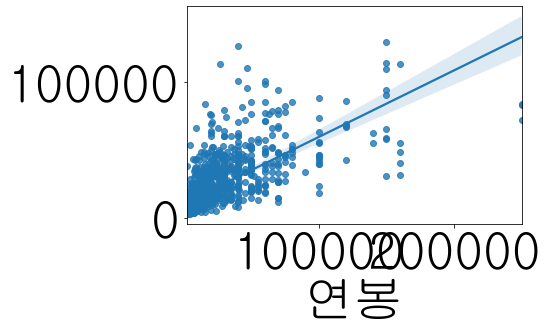

In [35]:
sns.regplot(y_train, y_predict)

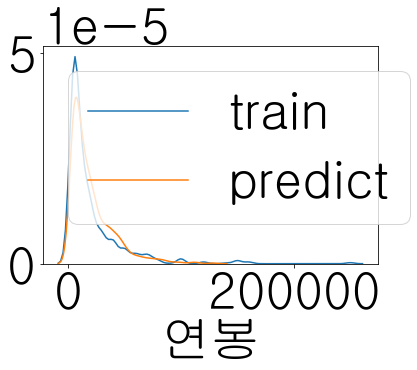

In [28]:
sns.distplot(y_train, hist=False, label="train")
sns.distplot(y_predict, hist=False, label="predict")

In [29]:
error = abs(y_train - y_predict)
error.mean()

10144.62044359783

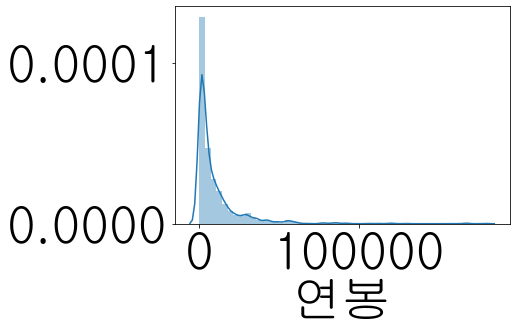

In [36]:
sns.distplot(error)

In [31]:
error.describe()

count      1319.000000
mean      10144.620444
std       16651.538503
min           1.000000
25%        1483.516667
50%        4188.000000
75%       11774.000000
max      178510.000000
Name: 연봉, dtype: float64

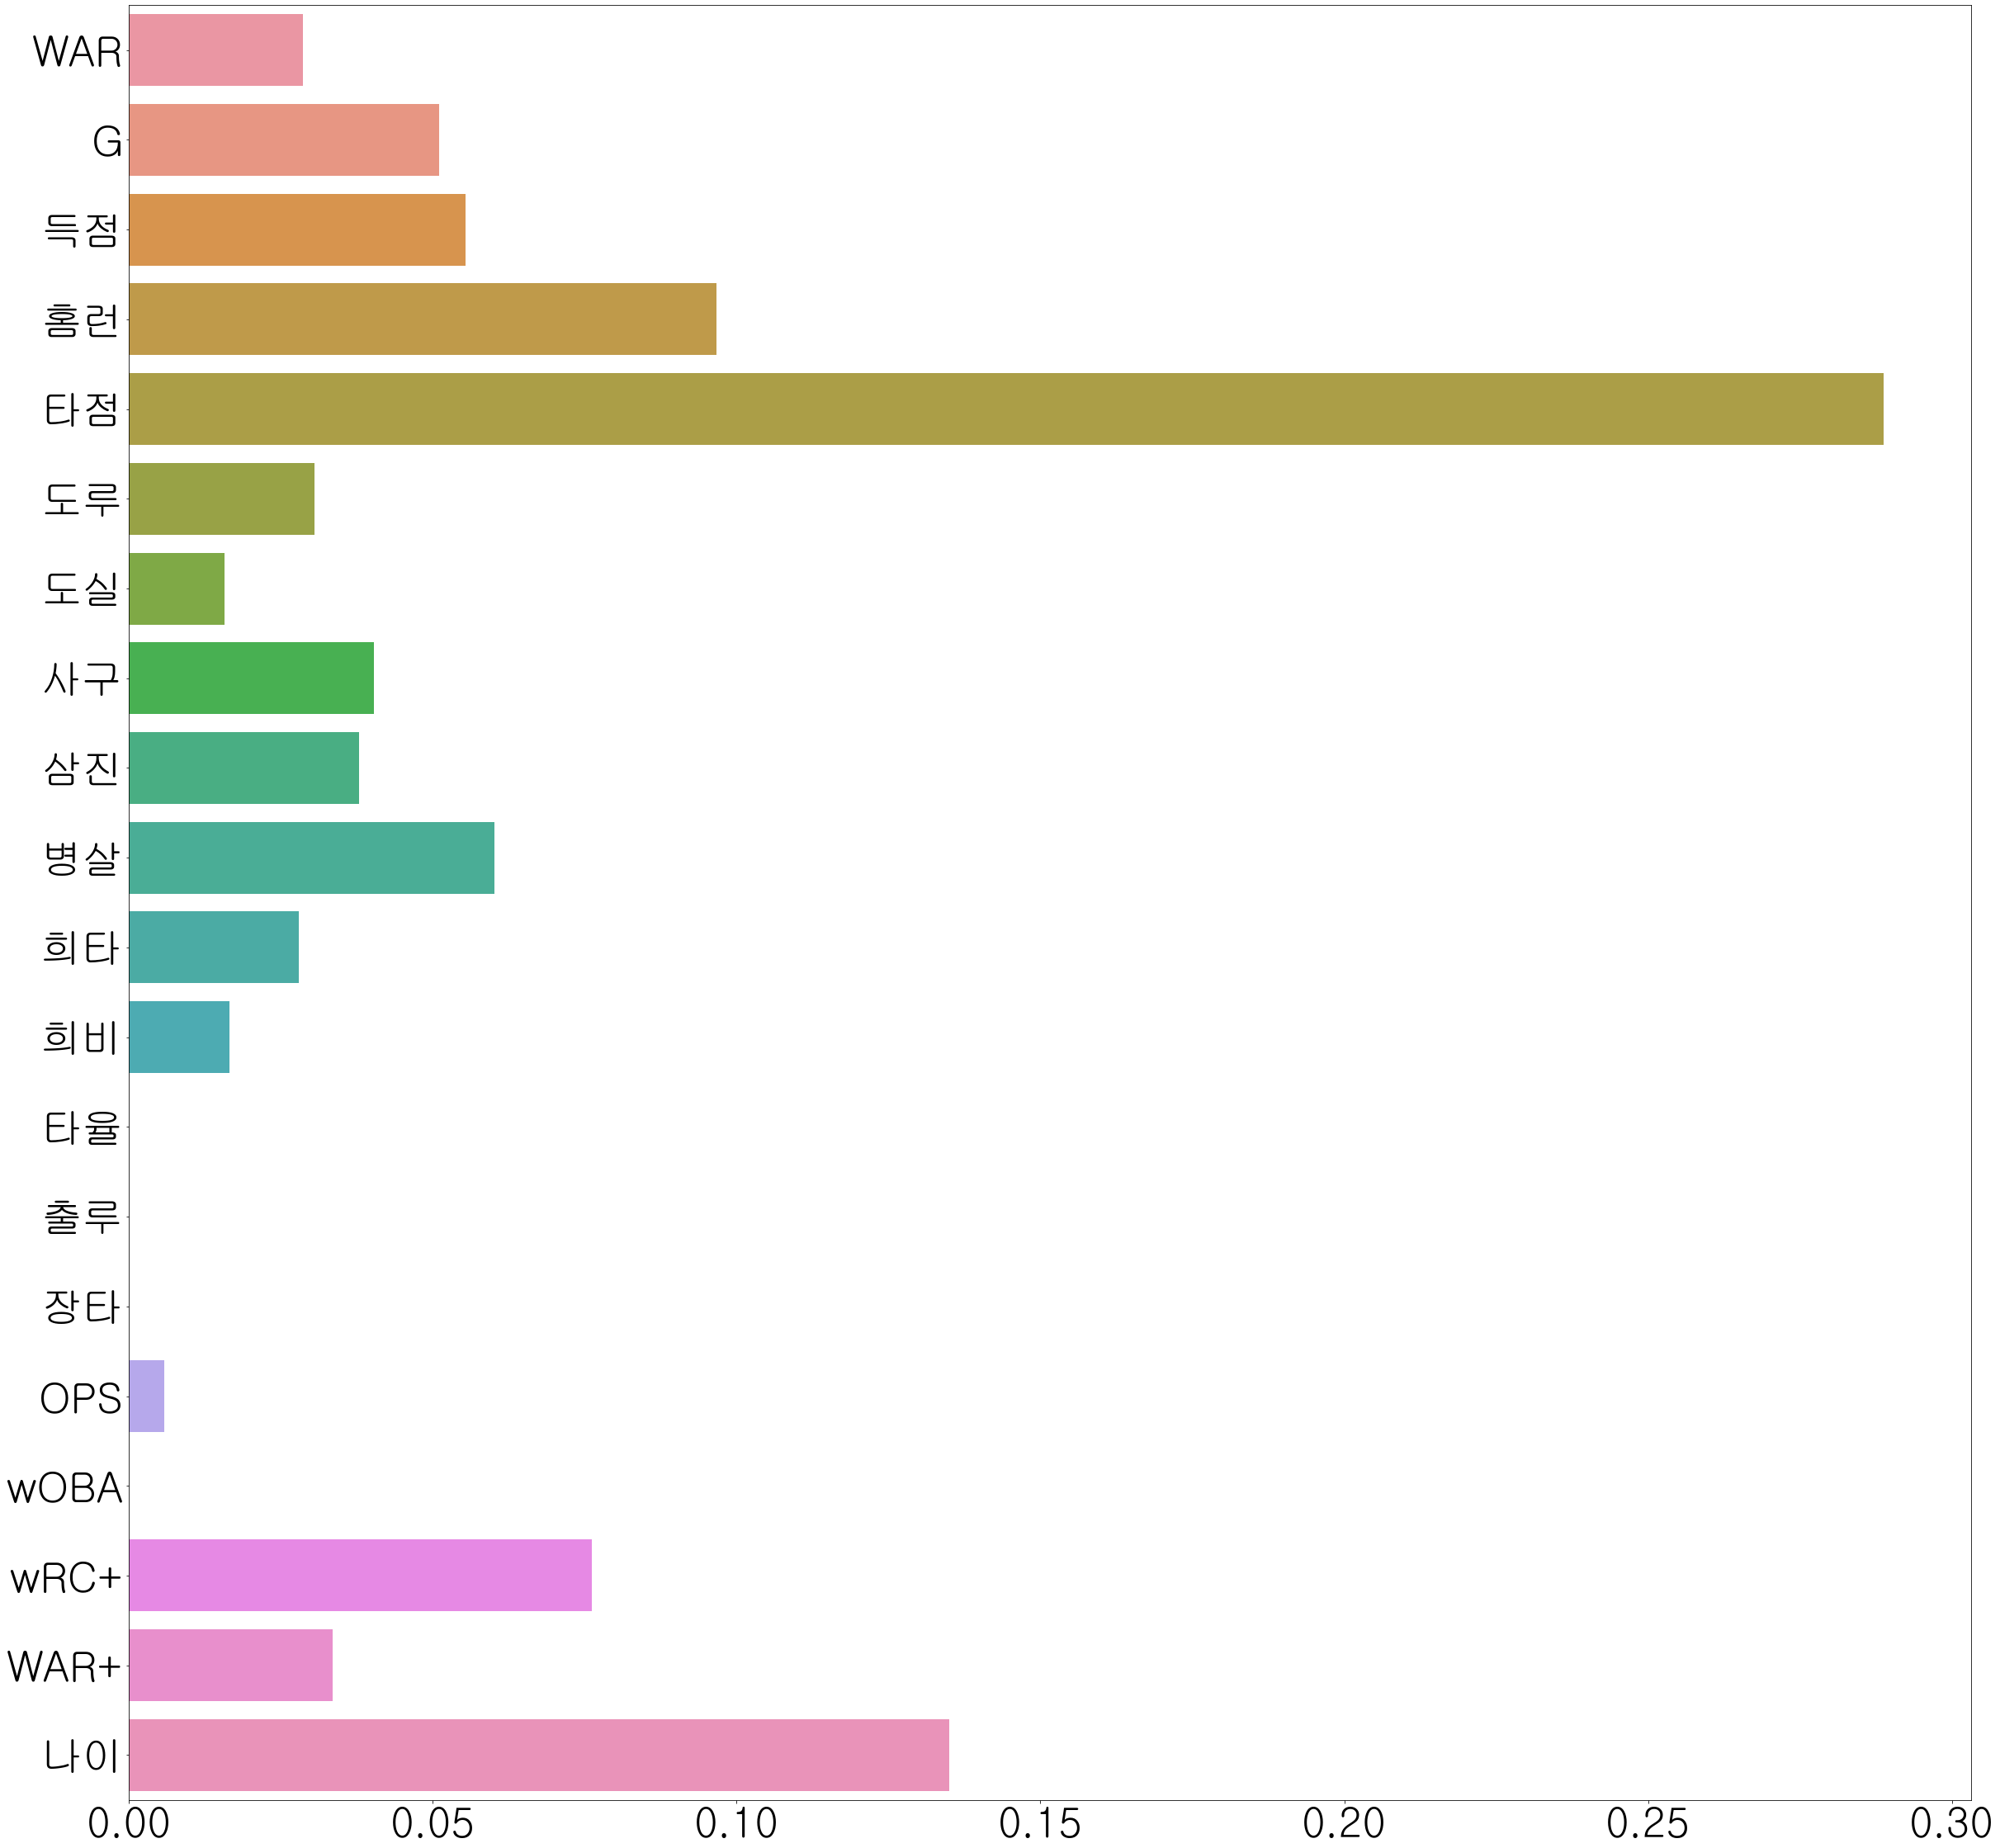

In [34]:
plt.rcParams['font.size']=50
plt.figure(figsize=(40,40))
sns.barplot(x=best_estimator.feature_importances_, y=feature_names)

In [81]:
df['고4'].describe()
df[df['고4']==7][['선수','고4']].count

<bound method DataFrame.count of        선수   고4
295   김태균  7.0
301   김태균  7.0
618   손아섭  7.0
864   이대호  7.0
880   이범호  7.0
975   이재원  7.0
1052  이호준  7.0
1332   최정  7.0
1362  최진행  7.0
1368  최형우  7.0
1369  최형우  7.0
1382  최희섭  7.0>